<a href="https://colab.research.google.com/github/rakshithcgowda/Machine-learning-project/blob/main/Crab_Age_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install tensorflow


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
data.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [4]:
data['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [5]:
# https://www.kaggle.com/code/ethanabimelech/house-prices-eda-xgboost
# https://www.kaggle.com/code/kartikkumaria/house-price-using-tensorflow-and-pycaret

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<ipython-input-7-57663f6a2b9e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


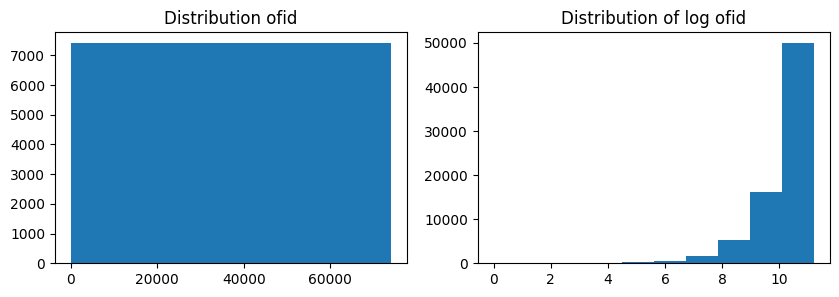

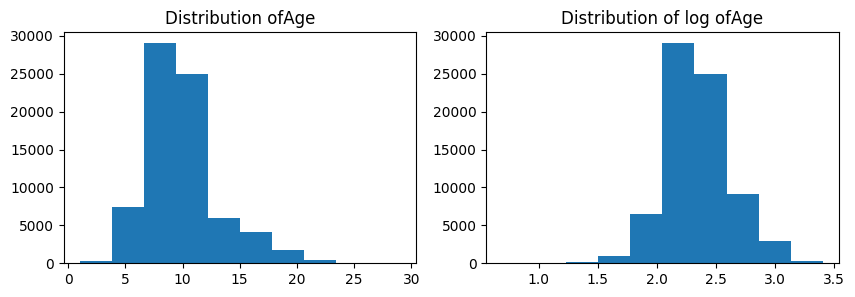

In [7]:
for column in train_df.columns:
  if train_df[column].dtype == 'int64':
    fig , ax = plt.subplots(figsize = (10,3))
    plt.subplot(1,2,1)
    plt.hist(train_df[column]);
    plt.title('Distribution of'+column);
    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(train_df[column]));
    plt.title('Distribution of log of'+column);

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in train_df.columns:
    if train_df[column].dtype == "object":
        train_df[column] = label_encoder.fit_transform(train_df[column])
for column in test_df.columns:
    if test_df[column].dtype == "object":
        test_df[column] = label_encoder.fit_transform(test_df[column])

In [9]:
y = train_df["Age"]
x = train_df.drop("Age",axis=1 )

In [10]:
x_arr = x.values
y_arr = y.values

In [11]:
x_arr.shape

(74051, 9)

In [12]:
y_arr.shape

(74051,)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size=0.3,random_state=42)

In [14]:
print("x train size: ",x_train.shape)
print("y train size: ",y_train.shape)
print("x test size: ",x_test.shape)
print("y test size: ",y_test.shape)

x train size:  (51835, 9)
y train size:  (51835,)
x test size:  (22216, 9)
y test size:  (22216,)


In [15]:
import tensorflow.keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def get_model():
    model = Sequential([
        Dense(128, input_shape=(9,), activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(
        loss="mse",
        optimizer="adam",
        metrics=[rmse]  # Use the custom RMSE metric here
    )
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [17]:
es_cb = EarlyStopping(monitor="val_loss", patience=10)

model = get_model()

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    verbose=0
)

In [18]:
final_loss, final_rmse = model.evaluate(x_test, y_test)
print(f"Final Loss: {final_loss}, Final RMSE: {final_rmse}")

695/695 [==============================] - 1s 1ms/step - loss: 5.3912 - rmse: 2.2541
Final Loss: 5.391213417053223, Final RMSE: 2.254056692123413


In [19]:
x_test_arr = test_df.values

In [20]:
predicted_values = model.predict(x_test_arr)

1543/1543 [==============================] - 2s 1ms/step


In [21]:
predicted_values_antilog = np.exp(predicted_values)

In [26]:
# Assuming 'test_df' and 'predicted_values' are defined correctly

# Check if predicted_values needs flattening
if predicted_values.ndim > 1:
    predicted_values = predicted_values.flatten()  # Or handle differently as needed

# Create DataFrame with flattened predicted_values
submi = pd.DataFrame({'id': test_df['id'], 'Age': predicted_values})

submi.to_csv('submission.csv', index=False)

In [27]:
x = pd.read_csv('submission.csv')
x.head()

,id,Age
0,74051,6.142974
1,74052,7.464593
2,74053,7.878858
3,74054,9.676630
4,74055,6.764767
